Subscribe to DataSciPie

# Linear Regression

Import necessary Packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

Download Data

In [13]:
emission = pd.read_csv(r'emission_analysis.csv')  # provide file path

In [14]:
emission.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Data Cleaning

In [16]:
df=emission[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [17]:
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Train Test Split

In [28]:
mask=np.random.rand(len(emission)) <0.8
train=df[mask]
test=df[~mask]

Visualize data

<function matplotlib.pyplot.show(*args, **kw)>

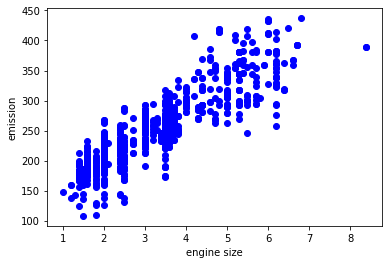

In [32]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('engine size')
plt.ylabel('emission')
plt.show

Creat a linear regression Model

y=mx+c (where m is slope or coefficient and c is y intercenpt)

In [57]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
reg.fit (train_x, train_y)
print('intercept:',reg.intercept_)
print('coefficient',reg.coef_)

intercept: [124.22515293]
coefficient [[39.28383015]]


Plot regression line

<function matplotlib.pyplot.show(*args, **kw)>

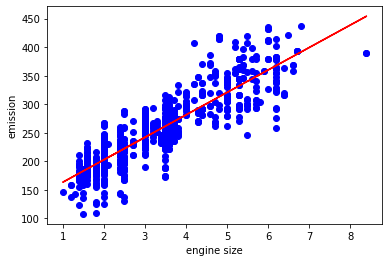

In [58]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('engine size')
plt.ylabel('emission')
plt.plot(train_x,reg.coef_*train_x+reg.intercept_,color='red')
plt.show

Evaluation of model accuracy

![title](r2.png)

In [67]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_pred=reg.predict(test_x)
print('r2_score:',r2_score(test_y_pred,test_y))

r2_score: 0.6582826470328251
